## ♦ Grabbing static text files with `Pandas`
While once much more common, a number of agencies still provide access to data as raw text files served up on a web server. Some examples are [USGS Water Use Data](https://water.usgs.gov/watuse/data/2010/index.html), and [NWIS Stream Flow data](https://waterdata.usgs.gov/nc/nwis/water_use?format=rdb&rdb_compression=value&wu_area=County&wu_year=ALL&wu_county=ALL&wu_category=IN&wu_county_nms=--ALL%2BCounties--&wu_category_nms=Industrial). If you've ever used these data in your projects, you know it's fairly easy to manage: just download the link to the file (if a download link is provided), or justcopy and paste. 

But if you have a lot of files to download, or if, like the stream gage data, you need to download it in real-time for your reseach, you can write a script to do this. Turns out it's note even that hard, thanks to the `pandas` package. 

This notebook demonstrates how `pandas` can read a text file from the web just as easily as a text file located on our local machine. We just substitute the data's web address (i.e., its URL) where we'd put the filename in using the `read_csv` function. It's that easy, but it only works if the data being served remotely is a raw text file...

Here we examine the process for grabbing 2010 water use data for North Carolina hosted on a USGS server...

First, for argument's sake, let's see how this data set would be nabbed manually:
* Navigate to https://waterdata.usgs.gov/nwis/wu
* In the upper-righthand side, select `North Carolina` from the dropdown
* Select `State Data`
* For retrieval criteria, choose:
 * Year `--All Years--`
 * Area Type: `County`, `--All Counties--`
 * Category: `Industrial`
* Hit `Submit`
* For Output Format, select `Tab-separated data` and `Display in Browser`
* When the data appear, the URL in the browser is what we want; it will always link to these data, and we can use pandas to pull the data we want using that URL.  

In [1]:
# Import the pandas module
import pandas as pd

In [2]:
# Set the url as a variable; this is the URL we generated above
theURL = 'https://waterdata.usgs.gov/nc/nwis/water_use?format=rdb&rdb_compression=value&wu_area=County&wu_year=ALL&wu_county=ALL&wu_category=IN&wu_county_nms=--ALL%2BCounties--&wu_category_nms=Industrial'

In [3]:
# Read in the data as a pandas data frame and display the first 5 rows
# -Note we need to specify that it's a tab delimited file and uses '#' to indicated commments
dfNWIS = pd.read_csv(theURL, delimiter='\t', comment='#')
dfNWIS.head()

,state_cd,state_name,county_cd,county_nm,year,"Industrial self-supplied groundwater withdrawals, fresh, in Mgal/d","Industrial self-supplied groundwater withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, groundwater, in Mgal/d","Industrial self-supplied surface-water withdrawals, fresh, in Mgal/d","Industrial self-supplied surface-water withdrawals, saline, in Mgal/d",...,"Industrial total self-supplied withdrawals, fresh, in Mgal/d","Industrial total self-supplied withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, in Mgal/d","Industrial deliveries from public supply, in Mgal/d","Industrial total self-supplied withdrawals plus deliveries, in Mgal/d","Industrial consumptive use, fresh, in Mgal/d","Industrial consumptive use, saline, in Mgal/d","Industrial total consumptive use, in Mgal/d","Industrial reclaimed wastewater, in Mgal/d",Industrial number of facilities
0,2s,40s,3s,40s,4s,16s,16s,16s,16s,16s,...,16s,16s,16s,16s,16s,16s,16s,16s,16s,16s
1,37,North Carolina,001,Alamance County,1985,0.19,0.00,0.19,3.39,0.00,...,3.58,0.00,3.58,3.13,6.71,1.74,0.00,1.74,0.00,-
2,37,North Carolina,001,Alamance County,1990,0.06,0.00,0.06,2.60,0.00,...,2.66,0.00,2.66,6.42,9.08,1.00,0.00,1.00,0.00,8
3,37,North Carolina,001,Alamance County,1995,0.57,0.00,0.57,4.68,0.00,...,5.25,0.00,5.25,7.33,12.58,2.52,0.00,2.52,0.00,83
4,37,North Carolina,001,Alamance County,2000,0.00,0.00,0.00,0.23,0.00,...,0.23,0.00,0.23,-,-,-,-,-,-,-


So there's one catch: the second line of the dataframe is not the data we want, but rather a listing of the field type and width. Pandas offers two ways around this. First, we could just drop the first row...

In [4]:
#Drop the first row, and again show the first 5 rows of data...
dfNWIS.drop(0,axis='rows',inplace=True)
dfNWIS.head()

,state_cd,state_name,county_cd,county_nm,year,"Industrial self-supplied groundwater withdrawals, fresh, in Mgal/d","Industrial self-supplied groundwater withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, groundwater, in Mgal/d","Industrial self-supplied surface-water withdrawals, fresh, in Mgal/d","Industrial self-supplied surface-water withdrawals, saline, in Mgal/d",...,"Industrial total self-supplied withdrawals, fresh, in Mgal/d","Industrial total self-supplied withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, in Mgal/d","Industrial deliveries from public supply, in Mgal/d","Industrial total self-supplied withdrawals plus deliveries, in Mgal/d","Industrial consumptive use, fresh, in Mgal/d","Industrial consumptive use, saline, in Mgal/d","Industrial total consumptive use, in Mgal/d","Industrial reclaimed wastewater, in Mgal/d",Industrial number of facilities
1,37,North Carolina,001,Alamance County,1985,0.19,0.00,0.19,3.39,0.00,...,3.58,0.00,3.58,3.13,6.71,1.74,0.00,1.74,0.00,-
2,37,North Carolina,001,Alamance County,1990,0.06,0.00,0.06,2.60,0.00,...,2.66,0.00,2.66,6.42,9.08,1.00,0.00,1.00,0.00,8
3,37,North Carolina,001,Alamance County,1995,0.57,0.00,0.57,4.68,0.00,...,5.25,0.00,5.25,7.33,12.58,2.52,0.00,2.52,0.00,83
4,37,North Carolina,001,Alamance County,2000,0.00,0.00,0.00,0.23,0.00,...,0.23,0.00,0.23,-,-,-,-,-,-,-
5,37,North Carolina,001,Alamance County,2005,0.00,0.00,0.00,0.14,0.00,...,0.14,0.00,0.14,-,-,-,-,-,-,-


Another way around this is to invoke the skip rows option when reading the CSV. If you look at the file we are importing, you see that the first 49 rows are comments, then comes our header row, and then the field type row that we don't want. So we want to skip rows 1 thru 49 and also line 51. If we create a list of these row numbers, we can pass that to the skip_rows parameter...

In [5]:
#Create a list of numbers 0 thru 49, recalling Python lists are zero-indexed...
rowsToSkip = list(range(49))
#Append '51' to the list
rowsToSkip.append(50)

In [6]:
#Use the read_csv function as before, but skip the rows we want to skip
dfNWIS = pd.read_csv(theURL, delimiter='\t', skiprows=rowsToSkip)
dfNWIS.head()

,state_cd,state_name,county_cd,county_nm,year,"Industrial self-supplied groundwater withdrawals, fresh, in Mgal/d","Industrial self-supplied groundwater withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, groundwater, in Mgal/d","Industrial self-supplied surface-water withdrawals, fresh, in Mgal/d","Industrial self-supplied surface-water withdrawals, saline, in Mgal/d",...,"Industrial total self-supplied withdrawals, fresh, in Mgal/d","Industrial total self-supplied withdrawals, saline, in Mgal/d","Industrial total self-supplied withdrawals, in Mgal/d","Industrial deliveries from public supply, in Mgal/d","Industrial total self-supplied withdrawals plus deliveries, in Mgal/d","Industrial consumptive use, fresh, in Mgal/d","Industrial consumptive use, saline, in Mgal/d","Industrial total consumptive use, in Mgal/d","Industrial reclaimed wastewater, in Mgal/d",Industrial number of facilities
0,37,North Carolina,1,Alamance County,1985,0.19,0.0,0.19,3.39,0.0,...,3.58,0.0,3.58,3.13,6.71,1.74,0.00,1.74,0.00,-
1,37,North Carolina,1,Alamance County,1990,0.06,0.0,0.06,2.60,0.0,...,2.66,0.0,2.66,6.42,9.08,1.00,0.00,1.00,0.00,8
2,37,North Carolina,1,Alamance County,1995,0.57,0.0,0.57,4.68,0.0,...,5.25,0.0,5.25,7.33,12.58,2.52,0.00,2.52,0.00,83
3,37,North Carolina,1,Alamance County,2000,0.00,0.0,0.00,0.23,0.0,...,0.23,0.0,0.23,-,-,-,-,-,-,-
4,37,North Carolina,1,Alamance County,2005,0.00,0.0,0.00,0.14,0.0,...,0.14,0.0,0.14,-,-,-,-,-,-,-


Now that we have this as a pandas data frame, we can analyze it here, or we can simply save a copy to our local machine. For the latter, pandas' to_csv() function works quite easily. 

In [7]:
dfNWIS.to_csv("Data/NCWaterData.csv",index=False)

*Teaser*: We'll look more and Pandas soon, but here we see we can make a quick plot of the data. Here we plot an annual time series of NC Industrial groundwater withdrawals:  

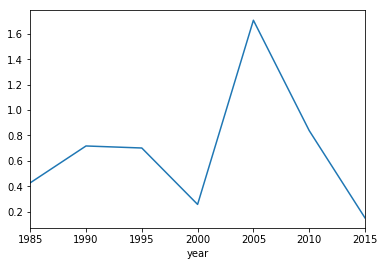

In [8]:
%matplotlib inline
col =  'Industrial self-supplied groundwater withdrawals, fresh, in Mgal/d'
dfNWIS.groupby('year')[col].mean().plot();

---
## Exercise: 
► See if you can import NWIS discharge data located at this web address:<br>
http://waterdata.usgs.gov/nwis/uv?cb_00060=on&cb_00065=on&format=rdb&period=1&begin_date=&end_date=&site_no=02085070<br> and save it to a file named `NWISDischarge.csv`.